In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
!pip install category_encoders
!pip install graphviz

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree

In [8]:
data='/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [10]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [11]:
#data processing and EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
df.shape

(1727, 7)

In [13]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
['med' 'high' 'low']
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [14]:
#class is balanced or not
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: ylabel='count'>

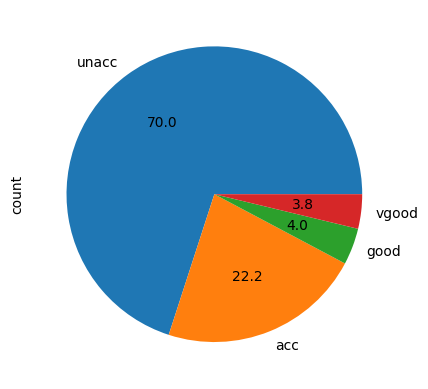

In [15]:
df['class'].value_counts().plot(kind="pie",autopct='%1.1f')

#observation is class is imbalance need to balance

encoding data

In [16]:
X = df.drop(['class'],axis=1)
y = df['class']

In [17]:
#encoding data
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X)


In [18]:
le = LabelEncoder()
y_en = le.fit_transform(y)


In [19]:
#spli tha data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X_en, y_en ,test_size = 0.33,random_state = 42)

In [20]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criteriaon gini index:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criteriaon gini index:0.8053


In [22]:
cm = confusion_matrix(y_test,y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [23]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [24]:
#create a dataframe for array formated confusion matrix

cm_df = pd.DataFrame(cm,index = classes_name,columns = classes_name)
cm_df

,acc,good,unacc,vgood
acc,71,0,56,0
good,18,0,0,0
unacc,11,0,388,0
vgood,26,0,0,0


<Axes: >

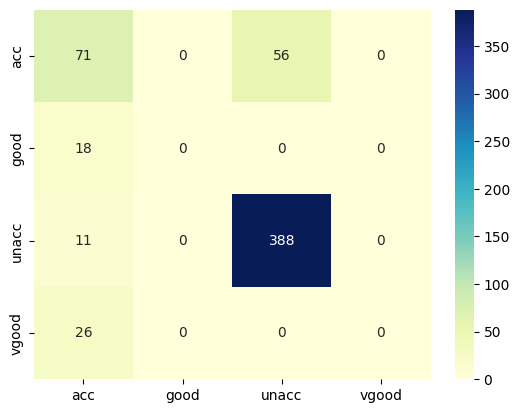

In [25]:
sns.heatmap(cm_df, annot=True, fmt='d',cmap='YlGnBu')

In [26]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#class  balancingi
import imblearn
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['class'],axis=1)
y=df['class']
ran=RandomUnderSampler()
X_rs,y_rs = ran.fit_resample(X,y)


In [28]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X_rs)


In [29]:
le = LabelEncoder()
y_en = le.fit_transform(y_rs)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_en, y_en ,test_size = 0.33,random_state = 42)

In [31]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criteriaon gini index:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criteriaon gini index:0.5814


In [33]:
cm = confusion_matrix(y_test,y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[12  1  0  4]
 [20  3  0  4]
 [ 6  0 14  1]
 [ 0  0  0 21]]


In [34]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [35]:
cm_df = pd.DataFrame(cm,index = classes_name,columns = classes_name)
cm_df

,acc,good,unacc,vgood
acc,12,1,0,4
good,20,3,0,4
unacc,6,0,14,1
vgood,0,0,0,21


<Axes: >

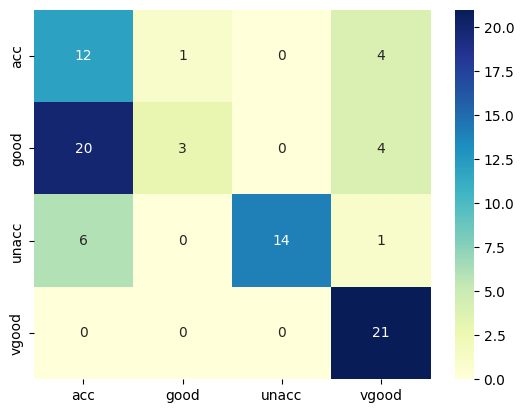

In [36]:
sns.heatmap(cm_df, annot=True, fmt='d',cmap='YlGnBu')

In [37]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.32      0.71      0.44        17
           1       0.75      0.11      0.19        27
           2       1.00      0.67      0.80        21
           3       0.70      1.00      0.82        21

    accuracy                           0.58        86
   macro avg       0.69      0.62      0.56        86
weighted avg       0.71      0.58      0.54        86



In [38]:
from imblearn.combine import SMOTEENN
X = df.drop(['class'],axis=1)
y= df['class']
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X)
le = LabelEncoder()
y_en = le.fit_transform(y)

ran=SMOTEENN()
X_rs,y_rs=ran.fit_resample(X_en,y_en)





In [39]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X)

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X_rs, y_rs ,test_size = 0.33,random_state = 42)

In [103]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [104]:
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criteriaon gini index:{0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criteriaon gini index:0.7879


In [105]:
cm = confusion_matrix(y_test,y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[225  73   0  41]
 [  0 357   0  39]
 [ 74  20 130  47]
 [  0   0   0 380]]


In [106]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [107]:
cm_df = pd.DataFrame(cm,index = classes_name,columns = classes_name)
cm_df

,acc,good,unacc,vgood
acc,225,73,0,41
good,0,357,0,39
unacc,74,20,130,47
vgood,0,0,0,380


<Axes: >

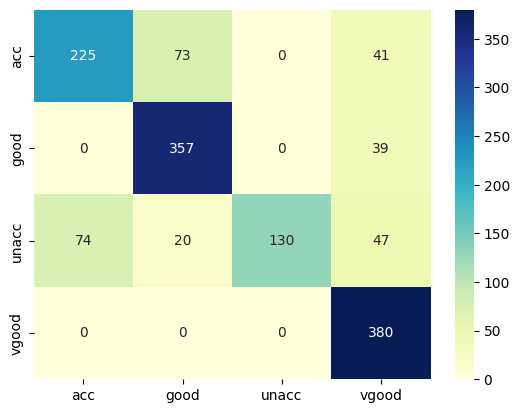

In [108]:
sns.heatmap(cm_df, annot=True, fmt='d',cmap='YlGnBu')

In [109]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.75      0.66      0.71       339
           1       0.79      0.90      0.84       396
           2       1.00      0.48      0.65       271
           3       0.75      1.00      0.86       380

    accuracy                           0.79      1386
   macro avg       0.82      0.76      0.76      1386
weighted avg       0.81      0.79      0.78      1386



visiualize the tree

[Text(0.4230769230769231, 0.875, 'x[0] <= 2.5\ngini = 0.746\nsamples = 2811\nvalue = [664, 762, 579, 806]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 1.5\ngini = 0.5\nsamples = 741\nvalue = [359, 0, 382, 0]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 178\nvalue = [0, 0, 178, 0]'),
 Text(0.23076923076923078, 0.375, 'x[5] <= 2.5\ngini = 0.462\nsamples = 563\nvalue = [359, 0, 204, 0]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.362\nsamples = 471\nvalue = [359, 0, 112, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 92\nvalue = [0, 0, 92, 0]'),
 Text(0.6923076923076923, 0.625, 'x[5] <= 1.5\ngini = 0.682\nsamples = 2070\nvalue = [305, 762, 197, 806]'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 2.5\ngini = 0.477\nsamples = 653\nvalue = [182, 434, 37, 0]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.309\nsamples = 152\nvalue = [123, 0, 29, 0]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.235\nsamples = 501\nvalue = [59, 434, 8, 0]'),
 Text(0.846153846153846

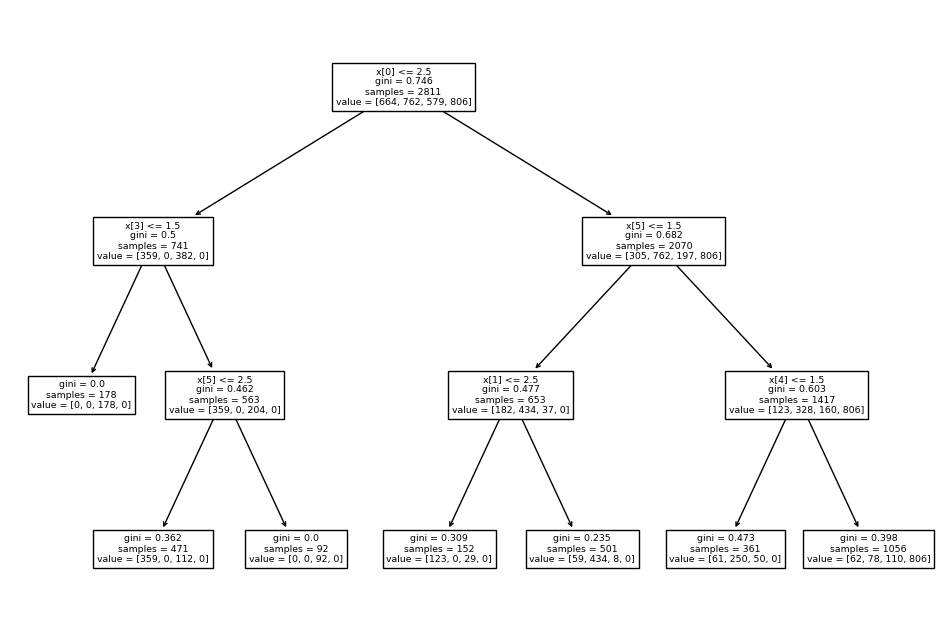

In [110]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

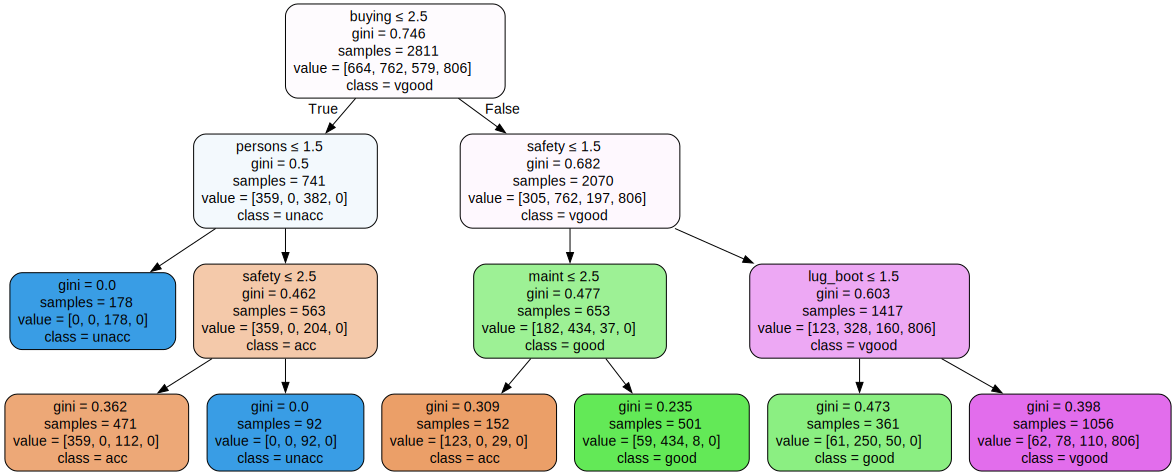

In [111]:
import graphviz
dot_data = tree.export_graphviz(clf_gini,out_file=None,feature_names=X_train.columns, class_names=classes_name,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [112]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[2,3,5,6,8,10,20],
    'min_samples_leaf':[5,10,20,50,100],
    'criterion':["gini","entropy"]
}

In [113]:
grid_search = GridSearchCV(estimator=clf_gini,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [114]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [115]:
best_par = grid_search.best_estimator_

In [116]:
def evaluate_model(dt_classifier):
    print("Train Accuray :",accuracy_score(y_train,dt_classifier.predict(X_train)))
    print("Train confusion matrix:")
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy:",accuracy_score(y_test,dt_classifier.predict(X_test)))
    print('Test confusion matrix')
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))
    cm=confusion_matrix(y_test,dt_classifier.predict(X_test))
    cm_df = pd.DataFrame(cm,index = classes_name,columns = classes_name)
    sns.heatmap(cm_df,annot = True, fmt = 'd',cmap='YlGnBu')
    print(classification_report(y_test,dt_classifier.predict(X_test)))

Train Accuray : 0.9868374244041267
Train confusion matrix:
[[660   1   0   3]
 [  6 756   0   0]
 [ 21   3 555   0]
 [  3   0   0 803]]
--------------------------------------------------
Test Accuracy: 0.9805194805194806
Test confusion matrix
[[328   9   0   2]
 [  1 395   0   0]
 [ 12   2 257   0]
 [  1   0   0 379]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       339
           1       0.97      1.00      0.99       396
           2       1.00      0.95      0.97       271
           3       0.99      1.00      1.00       380

    accuracy                           0.98      1386
   macro avg       0.98      0.98      0.98      1386
weighted avg       0.98      0.98      0.98      1386



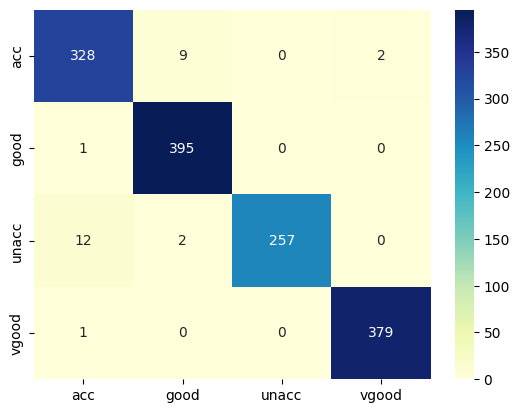

In [117]:
evaluate_model(best_par)

In [137]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.75      0.66      0.71       339
           1       0.79      0.90      0.84       396
           2       1.00      0.48      0.65       271
           3       0.75      1.00      0.86       380

    accuracy                           0.79      1386
   macro avg       0.82      0.76      0.76      1386
weighted avg       0.81      0.79      0.78      1386



In [138]:
best_par.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=0)

In [141]:
 print("Test Accuracy:",accuracy_score(y_test,best_par.predict(X_test)))

Test Accuracy: 0.9805194805194806


In [145]:
import joblib

filename = 'finalized_model.joblib'
joblib.dump(best_par,filename)

['finalized_model.joblib']

In [148]:
from IPython.display import FileLink
FileLink(r'finalized_model.joblib')

/kaggle/working/finalized_model.joblib